In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib.font_manager import FontProperties

# 设置字体
font_path = '../SimHei.ttf'  # 替换为你的字体文件路径
font = FontProperties(fname=font_path, size=12)

In [3]:
filepath = 'products_info.xlsx'
df = pd.read_excel(filepath)
cols = ['制造商', '产品名称', '产品描述', '类别', '子类别', '成本', '单价']
df = df[cols].drop_duplicates()
print(df.head())

       制造商   产品名称 产品描述  类别  子类别          成本          单价
0  Brother  个人复印机   彩色  技术  复印机  497.321905  665.129762
1  Hewlett  个人复印机   彩色  技术  复印机  433.173485  673.141667
2       佳能  个人复印机   彩色  技术  复印机  461.494762  666.330357
3       夏普  个人复印机   彩色  技术  复印机  422.693972  558.507086
4       惠普  个人复印机   彩色  技术  复印机  445.372727  578.890152


## 特征选择

In [4]:
# 删除与单价无关的“产品描述”
df.drop(columns = ['产品描述'], inplace=True)
print(df.head())

       制造商   产品名称  类别  子类别          成本          单价
0  Brother  个人复印机  技术  复印机  497.321905  665.129762
1  Hewlett  个人复印机  技术  复印机  433.173485  673.141667
2       佳能  个人复印机  技术  复印机  461.494762  666.330357
3       夏普  个人复印机  技术  复印机  422.693972  558.507086
4       惠普  个人复印机  技术  复印机  445.372727  578.890152


## 数据处理

### 独热编码

In [5]:
from sklearn.preprocessing import OneHotEncoder
df=pd.get_dummies(df,columns=['制造商', '产品名称', '类别', '子类别'])
print(df.head())

           成本          单价  制造商_Acco  制造商_Accos  制造商_Acme  制造商_Advantus  \
0  497.321905  665.129762     False      False     False         False   
1  433.173485  673.141667     False      False     False         False   
2  461.494762  666.330357     False      False     False         False   
3  422.693972  558.507086     False      False     False         False   
4  445.372727  578.890152     False      False     False         False   

   制造商_Ames  制造商_Avery  制造商_BIC  制造商_Barricks  ...  子类别_椅子  子类别_用具  子类别_用品  \
0     False      False    False         False  ...   False   False   False   
1     False      False    False         False  ...   False   False   False   
2     False      False    False         False  ...   False   False   False   
3     False      False    False         False  ...   False   False   False   
4     False      False    False         False  ...   False   False   False   

   子类别_电话  子类别_系固件  子类别_纸张  子类别_美术  子类别_装订机  子类别_设备  子类别_配件  
0   False    False   Fal

### 数据集划分

In [6]:
X = df.drop(columns = ['单价'])
y = df[['单价']]

In [7]:
from sklearn.model_selection import train_test_split

cols = X.columns.tolist()
cols.remove('成本')
cols = [element for element in cols if element.startswith("制造商") or element.startswith("子类别")]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=X[cols])
X_eval, X_test, y_eval, y_test = train_test_split(X_test, y_test, test_size=0.67, random_state=1, stratify=X_test[cols])
print("训练集数据："+str(X_train.shape[0]))
print("验证集数据："+str(X_eval.shape[0]))
print("测试集数据："+str(X_test.shape[0]))

训练集数据：1367
验证集数据：193
测试集数据：393


## 模型训练

In [8]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

In [33]:
def calculate_rmse(model, X, y):
    y_pred = model.predict(X)
    mse=mean_squared_error(y,y_pred)
    return np.sqrt(mse)
def calculate_r2(mode, X, y):
    y_pred = model.predict(X)
    r2=r2_score(y,y_pred)
    return r2

In [34]:
models = []
r2_list = []
rmse_list = []

### LinearRegression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=X[cols])

In [36]:
from sklearn.linear_model import LinearRegression

# 初始化线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# 评价
models.append('Linear Regression')
r2_list.append(calculate_r2(model, X_test, y_test))
rmse_list.append(calculate_rmse(model, X_test, y_test))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=X[cols])
X_eval, X_test, y_eval, y_test = train_test_split(X_test, y_test, test_size=0.67, random_state=1, stratify=X_test[cols])

### 岭回归

In [39]:
from sklearn.linear_model import RidgeCV, Ridge

In [40]:
# 设置 alpha 的候选值
alphas = np.logspace(-3, 3, 20)
print(alphas)
# 初始化 RidgeCV 模型，进行交叉验证
ridge_cv_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv_model.fit(X_train, y_train)

# 获取最佳 alpha
best_alpha = ridge_cv_model.alpha_
print(f'Best Alpha: {best_alpha}')

[1.00000000e-03 2.06913808e-03 4.28133240e-03 8.85866790e-03
 1.83298071e-02 3.79269019e-02 7.84759970e-02 1.62377674e-01
 3.35981829e-01 6.95192796e-01 1.43844989e+00 2.97635144e+00
 6.15848211e+00 1.27427499e+01 2.63665090e+01 5.45559478e+01
 1.12883789e+02 2.33572147e+02 4.83293024e+02 1.00000000e+03]
Best Alpha: 0.001


In [41]:
# 评价
models.append('Ridge Regression')
r2_list.append(calculate_r2(ridge_cv_model, X_test, y_test))
rmse_list.append(calculate_rmse(ridge_cv_model, X_test, y_test))

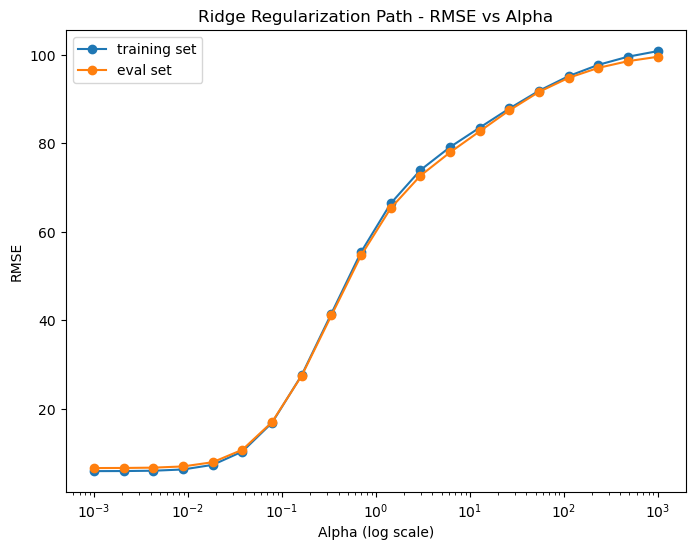

In [42]:
plt.figure(figsize=(8, 6))
# 设置 alpha 的候选值
alphas = np.logspace(-3, 3, 20)

# 初始化 Ridge 模型
ridge_model = Ridge()

# 存储不同 alpha 值下的 RMSE
rmse_values_train = []
rmse_values_eval = []

for alpha in alphas:
    # 设置当前 alpha
    ridge_model.set_params(alpha=alpha)
    
    # 训练模型
    ridge_model.fit(X_train, y_train)
    
    # 在测试集上进行预测
    y_pred = ridge_model.predict(X_train)
    y_eval_pred = ridge_model.predict(X_eval)
    
    # 计算 RMSE
    rmse = np.sqrt(mean_squared_error(y_eval, y_eval_pred))
    # 存储 RMSE 值
    rmse_values_eval.append(rmse)
    
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_values_train.append(rmse)

# 绘制正则化路径图
plt.plot(alphas, rmse_values_train, marker='o',label='training set')
plt.plot(alphas, rmse_values_eval, marker='o', label='eval set')
plt.legend()
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('RMSE')
plt.title('Ridge Regularization Path - RMSE vs Alpha')
plt.show()

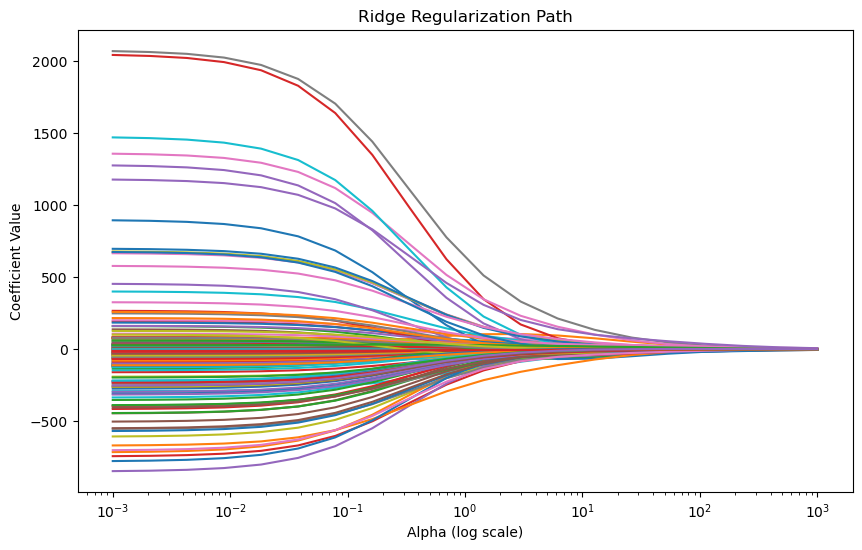

In [43]:
# 绘制正则化路径图
alphas = np.logspace(-3, 3, 20)
coefs = []

for a in alphas:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_.flatten())

coefs = np.array(coefs)

plt.figure(figsize=(10, 6))
for i in range(X_train.shape[1]):
    plt.plot(alphas, coefs[:, i], label=f'Feature {i + 1}')

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regularization Path')
plt.show()

### Lasso 回归

In [44]:
from sklearn.linear_model import LassoCV, Lasso

In [45]:
# 设置 alpha 的候选值
alphas = np.logspace(-3, 3, 20)

# 初始化 LassoCV 模型，进行交叉验证
lasso_cv_model = LassoCV(alphas=alphas, cv=5)
lasso_cv_model.fit(X_train, y_train)

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80808.85603411673, tolerance: 62925.4512197846
  model = cd_fast.enet_coordinate_descent_gram(
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86027.44491182074, tolerance: 62925.4512197846
  model = cd_fast.enet_coordinate_descent_gram(
/Users/helinwang/opt/anaco

LassoCV(alphas=array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
        cv=5)

In [46]:
# 获取最佳 alpha
best_alpha = lasso_cv_model.alpha_
print(f'Best Alpha: {best_alpha}')

Best Alpha: 0.001


/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+05, tolerance: 7.725e+04
  model = cd_fast.enet_coordinate_descent(
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.701e+05, tolerance: 7.725e+04
  model = cd_fast.enet_coordinate_descent(
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

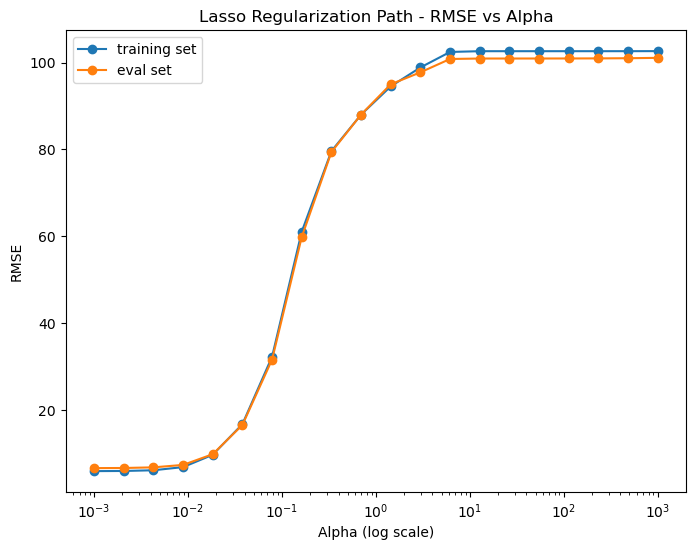

In [47]:
# 可视化调参过程
plt.figure(figsize=(8, 6))

# 初始化 Ridge 模型
lasso_model = Lasso()

# 存储不同 alpha 值下的 RMSE
rmse_values_train = []
rmse_values_eval = []

for alpha in alphas:
    # 设置当前 alpha
    lasso_model.set_params(alpha=alpha)
    
    # 训练模型
    lasso_model.fit(X_train, y_train)
    
    # 在测试集上进行预测
    y_pred = lasso_model.predict(X_train)
    y_eval_pred = lasso_model.predict(X_eval)
    
    # 计算 RMSE
    rmse = np.sqrt(mean_squared_error(y_eval, y_eval_pred))
    # 存储 RMSE 值
    rmse_values_eval.append(rmse)
    
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_values_train.append(rmse)

# 绘制正则化路径图
plt.plot(alphas, rmse_values_train, marker='o',label='training set')
plt.plot(alphas, rmse_values_eval, marker='o', label='eval set')
plt.legend()
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('RMSE')
plt.title('Lasso Regularization Path - RMSE vs Alpha')
plt.show()

In [48]:
# 评价
models.append('Lasso Regression')
r2_list.append(calculate_r2(lasso_cv_model, X_test, y_test))
rmse_list.append(calculate_rmse(lasso_cv_model, X_test, y_test))

In [49]:
print(rmse_list)

[6.37455595643666, 6.265821365827286, 6.277369516946318]


### Elastic Net

In [50]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

In [51]:
# 初始化 ElasticNetCV 模型，进行交叉验证选择最佳 alpha 和 l1_ratio
elastic_net_cv_model = ElasticNetCV(alphas=np.logspace(-3, 1, 20), l1_ratio=[.1, .5, .7, .9, .95, 1], cv=5)
elastic_net_cv_model.fit(X_train, y_train)

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2252915.486661991, tolerance: 62925.4512197846
  model = cd_fast.enet_coordinate_descent_gram(
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2388000.0982280145, tolerance: 65157.50032196182
  model = cd_fast.enet_coordinate_descent_gram(
/Users/helinwang/opt/ana

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1058433.5274657442, tolerance: 62791.3240251686
  model = cd_fast.enet_coordinate_descent_gram(
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1588827.530117474, tolerance: 61098.35672846899
  model = cd_fast.enet_coordinate_descent_gram(
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1849335.6303739948, tolerance: 61098.35672846899
  model = cd_fast.enet_coordinate_descent_gram(
/Us

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202023.98742818786, tolerance: 61098.35672846899
  model = cd_fast.enet_coordinate_descent_gram(
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1627422.7412079922, tolerance: 61098.35672846899
  model = cd_fast.enet_coordinate_descent_gram(
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1680119.6163281526, tolerance: 61098.35672846899
  model = cd_fast.enet_coordinate_descent_gram(
/

ElasticNetCV(alphas=array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1])

In [52]:
# 获取最佳 alpha 和 l1_ratio
best_alpha = elastic_net_cv_model.alpha_
best_l1_ratio = elastic_net_cv_model.l1_ratio_
print(f'Best Alpha: {best_alpha}')
print(f'Best L1 Ratio: {best_l1_ratio}')

Best Alpha: 0.001
Best L1 Ratio: 1.0


In [53]:
# 初始化 ElasticNet 模型，使用最佳参数
elastic_net_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elastic_net_model.fit(X_train, y_train)

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+05, tolerance: 7.725e+04
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.001, l1_ratio=1.0)

In [54]:
# 评价
models.append('ElasticNet')
r2_list.append(calculate_r2(elastic_net_model, X_test, y_test))
rmse_list.append(calculate_rmse(elastic_net_model, X_test, y_test))

In [55]:
print(rmse_list)

[6.37455595643666, 6.265821365827286, 6.277369516946318, 6.277369516946318]


### 随机森林

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [10]:
# 定义随机森林模型
rf_model = RandomForestRegressor()

# 使用GridSearchCV进行超参数调优
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pyto

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pyto

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pyto

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pyto

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pyto

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/helinwang/opt/anaconda3/envs/pyto

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [11]:
importances=grid_search.best_estimator_.feature_importances_

[3.98969698e-04 4.44348761e-04 5.99997916e-04 1.56105630e-03
 1.62684083e-03 1.97982744e-03 2.27865676e-03 2.67845425e-03
 3.26524040e-02 9.50629528e-01]


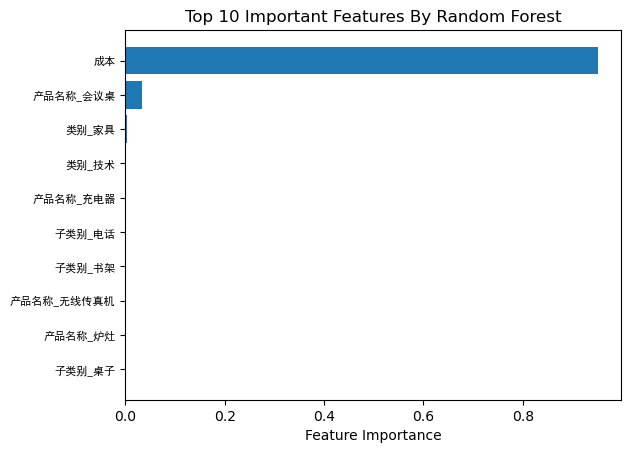

In [13]:
top10_indices = np.argsort(importances)[-10:]
print(importances[top10_indices])
feature_names = X.columns.tolist()
# 获取前20个最重要的特征名称
top10_feature_names = [feature_names[idx] for idx in top10_indices]

# 绘制条状图
plt.barh(range(10), importances[top10_indices], align='center')
plt.yticks(range(10), top10_feature_names, fontproperties=FontProperties(fname=font_path, size=8))
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features By Random Forest')
plt.show()

In [58]:
# 获取最佳参数
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 50}


In [59]:
best_model = grid_search.best_estimator_
# 评价
models.append('Random Forest')
r2_list.append(calculate_r2(best_model, X_test, y_test))
rmse_list.append(calculate_rmse(best_model, X_test, y_test))

### XGBoost

In [14]:
model = xgb.XGBRegressor(early_stopping_rounds=10,eval_metric=["rmse"])

param_grid = {
    'learning_rate': [0.1, 0.15, 0.2],
    'n_estimators': [170, 200, 230],
    'max_depth': [10, 15],
}
# 使用GridSearchCV进行网格搜索
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=2)

# 使用X_eval和y_eval作为验证集
eval_set = [(X_train, y_train), (X_eval, y_eval)]  
grid_search.fit(X_train, y_train, eval_set=eval_set, verbose=False)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=10,
                                    enable_categorical=False,
                                    eval_metric=['rmse'], feature_types=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.15, 0.2],
                         'max_depth': [10, 15],
                         'n_estimators': [170, 200, 230]},
             scoring='neg_mean_squared_error', verbose=2)

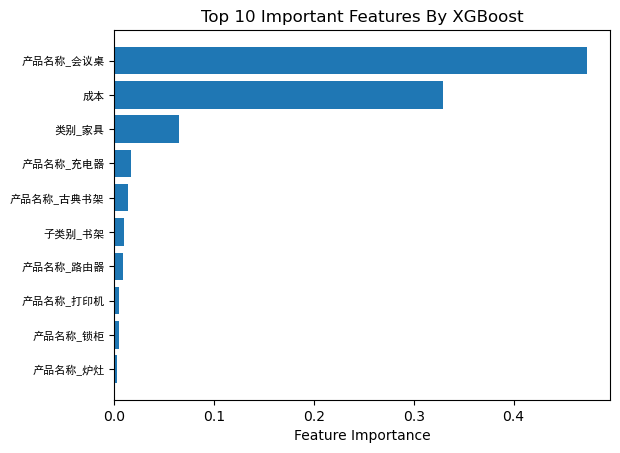

[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=170; total time=   6.7s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time=   9.4s
[CV] END ..learning_rate=0.1, max_depth=15, n_estimators=170; total time=   9.8s
[CV] END ..learning_rate=0.1, max_depth=15, n_estimators=230; total time=  10.8s
[CV] END .learning_rate=0.15, max_depth=10, n_estimators=200; total time=   9.4s
[CV] END .learning_rate=0.15, max_depth=10, n_estimators=230; total time=  10.4s
[CV] END .learning_rate=0.15, max_depth=15, n_estimators=230; total time=   6.5s
[CV] END ..learning_rate=0.2, max_depth=10, n_estimators=200; total time=   5.7s
[CV] END ..learning_rate=0.2, max_depth=10, n_estimators=230; total time=   7.9s
[CV] END ..learning_rate=0.2, max_depth=15, n_estimators=200; total time=   5.7s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=170; total time=   6.9s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=230; total time=  10.9s
[CV] END ..learning_rate=0.1

In [16]:
importances=grid_search.best_estimator_.feature_importances_

top10_indices = np.argsort(importances)[-10:]
feature_names = X.columns.tolist()
# 获取前20个最重要的特征名称
top10_feature_names = [feature_names[idx] for idx in top10_indices]

# 绘制条状图
plt.barh(range(10), importances[top10_indices], align='center')
plt.yticks(range(10), top10_feature_names, fontproperties=FontProperties(fname=font_path, size=8))
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features By XGBoost')
plt.show()

In [61]:
# 打印最佳参数
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.15, 'max_depth': 10, 'n_estimators': 230}


In [62]:
best_model = grid_search.best_estimator_
models.append("XGBoost")
rmse_list.append(calculate_rmse(best_model, X_test, y_test))
r2 = r2_score(y_test,best_model.predict(X_test))
r2_list.append(r2)

### KNN

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
# 定义KNN回归模型
knn = KNeighborsRegressor()

# 定义参数范围
param_grid = {'n_neighbors': [2, 3,4, 5], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# 使用GridSearchCV进行参数调优
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [65]:
# 输出最佳参数
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


In [66]:
# 使用最佳参数的模型进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 27.85041691706262


In [67]:
best_model = grid_search.best_estimator_
models.append("KNN")
rmse_list.append(calculate_rmse(best_model, X_test, y_test))
r2 = r2_score(y_test,best_model.predict(X_test))
r2_list.append(r2)

### ANN

In [68]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid

In [ ]:
ann = MLPRegressor(max_iter=400)  # 可根据实际情况调整 max_iter
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# 早停止
best_mse = float('inf')
best_params = None

for params in ParameterGrid(param_grid):
    ann.set_params(**params)
    ann.fit(X_train, y_train.iloc[:,0])
    
    y_eval_pred = ann.predict(X_eval)
    mse = mean_squared_error(y_eval, y_eval_pred)
   
    if mse < best_mse:
        best_mse = mse
        best_params = params

    # 如果在一定迭代次数内性能没有提升，提前终止训练
    if ann.n_iter_ > 50 and mse > 1.5 * best_mse:
        break

In [70]:
print("Best Parameters: ", best_params)

Best Parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}


In [71]:
ann = MLPRegressor(max_iter=400)
ann.set_params(**best_params)
ann.fit(X_train, y_train)

/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/helinwang/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=400)

In [72]:
models.append("ANN")
rmse_list.append(calculate_rmse(ann, X_test, y_test))
r2 = r2_score(y_test,ann.predict(X_test))
r2_list.append(r2)

### GBDT

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
gbdt = GradientBoostingRegressor()

# 定义参数网格
param_grid = {
    'n_estimators': [50, 100,150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10,15],
 #   'min_samples_split': [2, 3, 4],
 #   'min_samples_leaf': [1, 2, 3]
}

# 使用 GridSearchCV 进行参数调整
grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train.iloc[:,0])

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [76]:
# 输出最优参数
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}


In [77]:
best_model = grid_search.best_estimator_
models.append("GBDT")
rmse_list.append(calculate_rmse(best_model, X_test, y_test))
r2 = r2_score(y_test,best_model.predict(X_test))
r2_list.append(r2)

### SVR

In [78]:
from sklearn.svm import SVR

In [80]:
svr = SVR()
param_grid = {
    'kernel': ['linear'],
    #'C': [0.1, 1, 10],
   # 'gamma': [0.1, 1],
   # 'epsilon': [0.1, 0.2, 0.5]
}
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train.iloc[:,0].tolist())

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'kernel': ['linear']},
             scoring='neg_mean_squared_error')

In [81]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'kernel': 'linear'}


In [82]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(calculate_rmse(best_model,X_test,y_test))

93.21812919701826


In [83]:
best_model = grid_search.best_estimator_
models.append("SVR")
rmse_list.append(calculate_rmse(best_model, X_test, y_test))
r2 = r2_score(y_test,best_model.predict(X_test))
r2_list.append(r2)

## 模型评价

### RMSE对比条形图

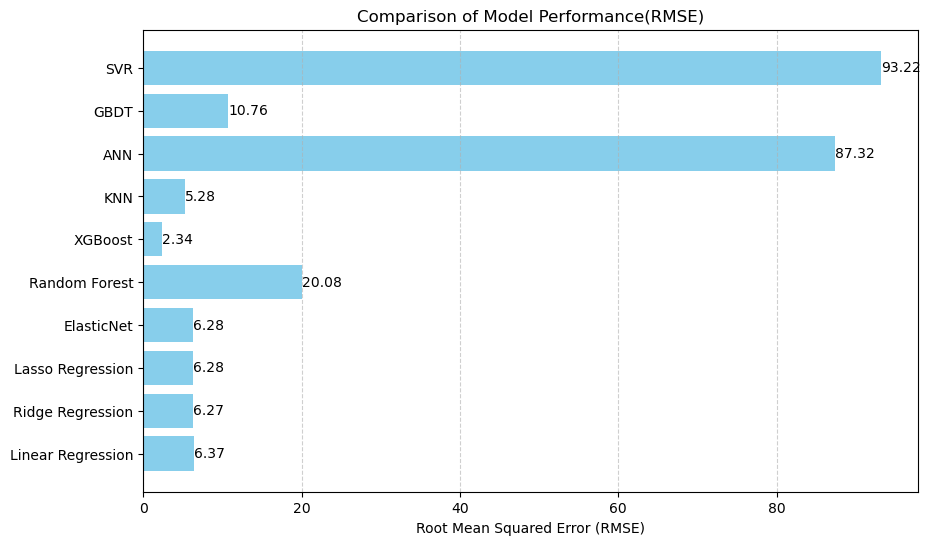

In [84]:
# 创建条形图
plt.figure(figsize=(10, 6))
plt.barh(models, rmse_list, color='skyblue')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of Model Performance(RMSE)')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 显示 RMSE 值
for index, value in enumerate(rmse_list):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

# 显示图形
plt.show()

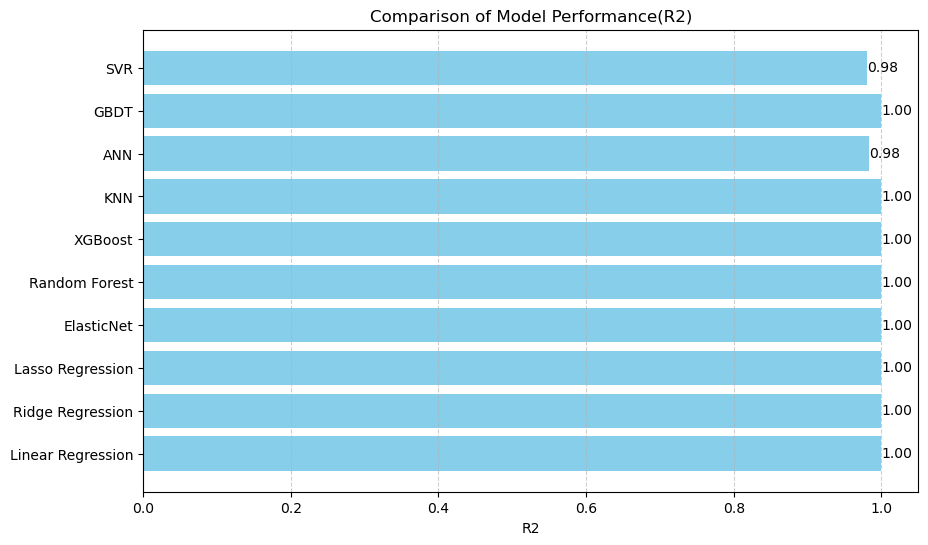

In [85]:
# 创建条形图
plt.figure(figsize=(10, 6))
plt.barh(models, r2_list, color='skyblue')
plt.xlabel('R2')
plt.title('Comparison of Model Performance(R2)')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 显示 RMSE 值
for index, value in enumerate(r2_list):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

# 显示图形
plt.show()